In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [41]:
# Define temperature range
#Temperature range:
T0 = 273.15
dt = 80

T = np.arange(T0, T0+dt+1, 1)
R = 8.314 # [m^3*Pa/K/mol]

# Define temperature conversion functions
def Kelvin_Celsius(t):
    """
    This function converts Temperature values from Kelvin to degrees Celsius
    """
    return t-273.15

def Celsius_Kelvin(t):
    """
    This function converts Temperature values from degrees Celsius to Kelvin
    """
    return t+273.15

# Load Henry's Law Constants:
DR = pd.read_csv("../Data/HenrysLawData.csv", index_col = "Compound")["DR"]
HR = pd.read_csv("../Data/HenrysLawData.csv", index_col = "Compound")["HR"]
kh = pd.read_csv("../Data/HenrysLawData.csv", index_col = "Compound")["k"]
theta = 1.022 # temperature correction factor

# Optimal gas composition calculation:

To determine what the optimal gas composition for growth on CO2 and H2, we start from the expected consumption by the microbes to the required ratio of transfer rates for both compounds and find the corresponding mol fractions in the gas feed.

With acetogenesis requiring twice as much hydrogen compared to CO2 (see 02_AcetogenYieldTempDependency), we start with:

<p> consumption ratio: </p>
<div style="text-align: center">  $ q_{CO_2} = Y_{C/H} * q_{H_2} $
</div>

<p> Assuming a steady state where the transfer rate equals the uptake rate, the transfer rate ratio is: </p>
<div style="text-align: center">  $ R_{T,CO_2} = Y_{C/H} * R_{T,H_2} <=> \displaystyle \frac{R_{T,CO_2}}{R_{T,H_2}} = Y_{C/H} $
</div>

<p> Transfer rate for compound i: </p>
<div style="text-align: center">  $ R_{T,i} = k_La_{T,i}*(c^*_{T,i} - c_{l,i}) $ [$mol/m^3/s$]
</div>

<p> with [Gas- and liquid-phase mass transfer resitance of organic compounds during mechanical surface aeration, C. Munz and P.V. Roberts; Vat. Res. Vol, 23, No. 5, pp. 589~01, 1989]: <br></p>
<div style="text-align: center">   
    $ k_La_{T,i} = \sqrt{D_i/D_{O_2}} * k_La_{T,O_2} $ <br>
    <br>
    $ c^*_{T,i} = H_{0,i}*e^{[k_{H,i}*(1/T-1/298.15)]}*y_i*P $ <br>
    $ c_{l,i} = 0 $
</div>

<p> Combines to: </p>
<div style="text-align: center">
    $ \displaystyle \frac
    {\sqrt{D_{CO_2}/D_{O_2}} * k_La_{T,O_2} * H_{0,CO_2} * e^{[k_{H,CO_2}*(1/T-1/298.15)]} * y_{CO_2} * P}
    {\sqrt{D_{H_2}/D_{O_2}} * k_La_{T,O_2} * H_{0,H_2} * e^{[k_{H,H_2}*(1/T-1/298.15)]} * y_{H_2} * P} = \displaystyle Y_{C/H} $ <br><br>
    $ \displaystyle \frac
    {H_{0,CO_2} * e^{[k_{H,CO_2}*(1/T-1/298.15)]} * y_{CO_2}}
    {H_{0,H_2} * e^{[k_{H,H_2}*(1/T-1/298.15)]} * y_{H_2}} = Y_{C/H} * \sqrt{D_{H_2}/D_{CO_2}}\displaystyle$ <br><br>
    $ \displaystyle \frac{y_{CO_2}}{y_{H_2}} = Y_{C/H} * \sqrt{D_{H_2}/D_{CO_2}}*e^{[(k_{H,H_2}-k_{H,CO_2})*(1/T-1/298.15)]}\displaystyle * H_{0,H_2}/H_{0,CO_2}$ <br><br>
</div>

we compare the maximum transfer rate of both gasses and take into consideration the stoichiometric requirements for growth. Based on elemental balances, acetogenesis requires twice as much hydrogen compared to CO2. (see 02_AcetogenYieldTempDependency)

In [3]:
print(f"(DR.H2/DR.CO2)^0.5 * HR.H2/HR.CO2 = {math.sqrt(DR.H2/DR.CO2)*HR.H2/HR.CO2}")

(DR.H2/DR.CO2)^0.5 * HR.H2/HR.CO2 = 0.034117892845908555


In [4]:
print(f"kh_H2 - kh_CO2 = {kh.H2-kh.CO2}")

kh_H2 - kh_CO2 = -1900


<p> Combines to: </p>
<div style="text-align: center">
$ \displaystyle \frac{y_{CO_2}}{y_{H_2}} = Y_{C/H}*0.034*e^{[-1900*(1/T-1/298.15)]}\displaystyle$
</div>

CO2/H2 ratio at 30°C: 0.019 and at 60°C: 0.033


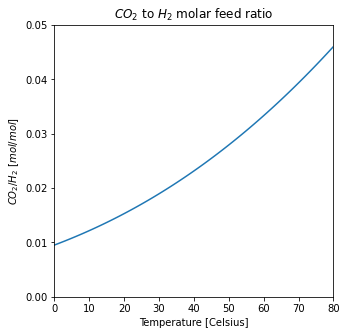

In [5]:
def FeedRatio(T,Y_CH):
    return Y_CH * math.sqrt(DR.H2/DR.CO2)*HR.H2/HR.CO2 * math.e**((kh.H2-kh.CO2)*(1/T-1/298.15))

Y_CH = 0.5

fig = plt.figure(figsize=(5,5))

plt.title(f"$CO_2$ to $H_2$ molar feed ratio")
plt.plot(Kelvin_Celsius(T), FeedRatio(T,Y_CH))
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 0, 0.05])
plt.xlabel('Temperature [Celsius]')
plt.ylabel(r'$CO_2/H_2$ [$mol/mol$]')

print(f"CO2/H2 ratio at 30°C: {round(FeedRatio(Celsius_Kelvin(30),Y_CH),3)} and at 60°C: {round(FeedRatio(Celsius_Kelvin(60),Y_CH),3)}")

<p> ratio: </p>
<div style="text-align: center">  $ y_{CO_2}/y_{H_2} = x  $
</div>
<p> if: </p>
<div style="text-align: center">  
$ y_{CO_2} + y_{H_2} = 1  $ </div>
<p> then: </p>
<div style="text-align: center">  
$ y_{CO_2}/(1 - y_{CO_2}) = x  $ <br><br>
$ y_{CO_2} = x * (1 - y_{CO_2}) $ <br><br>
$ y_{CO_2} = x - x * y_{CO_2} $ <br><br>
$ y_{CO_2} + x * y_{CO_2} = x $ <br><br>
$ (1 + x) * y_{CO_2} = x $ <br><br>
$ y_{CO_2} = x / (1 + x) $ <br><br>
</div>
<p> at 30°C: </p>
<div style="text-align: center"> $ y_{CO_2} = x_{30}/(1+x_{30}) = 0.0186 $
</div>
<p> at 60°C: </p>
<div style="text-align: center"> $ y_{CO_2} = x_{60}/(1+x_{60}) = 0.0322 $
</div>

In [6]:
print(f" At 30°C: \n  y_CO_2 = {round(FeedRatio(Celsius_Kelvin(30),0.5)/(1+FeedRatio(Celsius_Kelvin(30),0.5)),4)} \n  y_H_2 = {round(1-FeedRatio(Celsius_Kelvin(30),0.5)/(1+FeedRatio(Celsius_Kelvin(30),0.5)),4)} \n",
     f"At 60°C: \n  y_CO_2 = {round(FeedRatio(Celsius_Kelvin(60),0.5)/(1+FeedRatio(Celsius_Kelvin(60),0.5)),4)} \n  y_H_2 = {round(1-FeedRatio(Celsius_Kelvin(60),0.5)/(1+FeedRatio(Celsius_Kelvin(60),0.5)),4)} \n")

 At 30°C: 
  y_CO_2 = 0.0186 
  y_H_2 = 0.9814 
 At 60°C: 
  y_CO_2 = 0.0322 
  y_H_2 = 0.9678 



# However, if both gasses get significantly depleted and the composition and flow in the outlet is vastly different to the inlet (and thus in the reactor, assuming ideal mixing). The feed composition should tend towards being equal to the stoichiometric requirements!

In [15]:
v_gas = 0.3 # average gas velocity [m/s]
h_r = 30 # height of the reactor [m]
ar = 5 # aspect ratio: height to diameter

In [17]:
r = h_r/(ar * 2)
h = 2/3 * h_r # initial height of broth  assuming it is 2/3 filled [m]
A = math.pi * r**2 #reactor cross-sectional area [m^2]
V_L = A * h #reactor volume [m^3]
F_G = v_gas * A
Gas_holdup = 0.6*(v_gas)**0.7 #from Stephanie's paper
V_G = V_L*Gas_holdup

p_t = 101325 # pressure at the top of the reactor [Pa]
p_b = p_t + h * 1000 * 9.81 # pressure at the bottom of the reactor [Pa]
p_m = (p_b-p_t)/math.log(p_b/p_t) # logarithmic mean pressure [Pa]

h,r,A,V_L,V_G,F_G

(20.0,
 3.0,
 28.274333882308138,
 565.4866776461628,
 146.06915149392105,
 8.482300164692441)

In [25]:
def y_H2(T,c_lCO2):
    return (HR.CO2*math.e**(kh.CO2*(1/T-1/298.15))*p_m-c_lCO2)/(HR.H2*math.e**(kh.H2*(1/T-1/298.15))*p_m*(1/4)/(math.sqrt(DR.CO2/DR.H2))+HR.CO2*math.e**(kh.CO2*(1/T-1/298.15))*p_m)


In [31]:
y_H2(Celsius_Kelvin(60),0)

0.9836128224767143

# Aim at c_Gout = 0

In [42]:
def KLa(C,T):
    return 0.32 * (DR[C]/DR["O2"])**0.5 * v_gas**0.7 * theta**(T-293.15)# * 3600 #[1/s]

def Csat(C, T, y):
    return HR[C] * math.e**(kh[C]*(1/T-1/298.15)) * 10**(-5) * p_m * y

dfGR = pd.read_csv("../Data/EnthalpyGibbs.csv", index_col="Compound")["dfGR"]
dfHR = pd.read_csv("../Data/EnthalpyGibbs.csv", index_col="Compound")["dfHR"]

S = pd.DataFrame({
    'Cata':  [-4,  0,    -2,  2,    0,1],
    'Ana':   [-2.1, -0.2, -1,  1.5,  1,0]},
    index=pd.Index(["H2","NH3","CO2","Water","X","Acetate"]))

S

#Hess's law, as vector multiplication:
DrGR = np.nansum(S.Cata * dfGR)
DrHR = np.nansum(S.Cata * dfHR)

#Gibbs–Helmholtz equation for temperature correction
def DrGT(T):
    return DrGR * (T/298.15) + DrHR * (1-T/298.15)

def m_NGAM(T):
    return 3.3**(69000/R*(1/298-1/T)) #[kJ/h/CmolX]

In [43]:
m_NGAM(T)

array([4.85582471e-02, 5.54279580e-02, 6.32087282e-02, 7.20131913e-02,
       8.19668729e-02, 9.32095450e-02, 1.05896710e-01, 1.20201223e-01,
       1.36315068e-01, 1.54451301e-01, 1.74846161e-01, 1.97761390e-01,
       2.23486745e-01, 2.52342749e-01, 2.84683674e-01, 3.20900794e-01,
       3.61425914e-01, 4.06735213e-01, 4.57353401e-01, 5.13858243e-01,
       5.76885449e-01, 6.47133981e-01, 7.25371789e-01, 8.12442021e-01,
       9.09269735e-01, 1.01686914e+00, 1.13635144e+00, 1.26893323e+00,
       1.41594568e+00, 1.57884423e+00, 1.75921925e+00, 1.95880733e+00,
       2.17950355e+00, 2.42337455e+00, 2.69267271e+00, 2.98985120e+00,
       3.31758032e+00, 3.67876485e+00, 4.07656270e+00, 4.51440498e+00,
       4.99601730e+00, 5.52544272e+00, 6.10706618e+00, 6.74564068e+00,
       7.44631517e+00, 8.21466441e+00, 9.05672072e+00, 9.97900791e+00,
       1.09885774e+01, 1.20930469e+01, 1.33006410e+01, 1.46202352e+01,
       1.60614019e+01, 1.76344603e+01, 1.93505280e+01, 2.12215774e+01,
      

In [60]:
def y_H2(c_xmax,T):
    return R*T/p_m * m_NGAM(T)/(DrGT(T)*-1/4)*c_xmax*h/v_gas

In [61]:
Celsius_Kelvin(60)

333.15

In [66]:
y_H2(2.06,Celsius_Kelvin(30))

0.08866741206538103

In [ ]:
# Combine as transfer rate:
def RT(C,T,c,y):
    return KLa(C,T) * (Csat(C,T, y) - c)

In [71]:
c_H2 = np.arange(0,Csat("H2",Celsius_Kelvin(30),1),Csat("H2",Celsius_Kelvin(30),1)/20)
c_H2

array([0.        , 0.06909854, 0.13819708, 0.20729563, 0.27639417,
       0.34549271, 0.41459125, 0.48368979, 0.55278834, 0.62188688,
       0.69098542, 0.76008396, 0.8291825 , 0.89828105, 0.96737959,
       1.03647813, 1.10557667, 1.17467521, 1.24377376, 1.3128723 ])

In [72]:
def RT(C,T,y,c):
    return 0.32 * (DR[C]/DR["O2"])**0.5 * v_gas**0.7 * theta**(T-293.15) * (HR[C] * math.e**(kh[C]*(1/T-1/298.15)) * 10**(-5) * p_m * y - c)